In [20]:
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import os
import io
import numpy as np

In [21]:
#---Georges Bank
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 42.5

In [22]:
band07_path = "band07_data/20230901/"

filename = 'goes_e_band07_2023_09_01_01H_00M'

datetime = filename[14:]

In [23]:
file = open(band07_path+filename, 'rb')
BT = pickle.load(file)
file.close()

In [24]:
BT_c = BT.where((BT.lat>min_lat) & (BT.lat<max_lat) & (BT.lon>min_lon) & (BT.lon<max_lon))
BT_c = BT_c.dropna(dim="y", how="all")
BT_c = BT_c.dropna(dim="x", how="all")

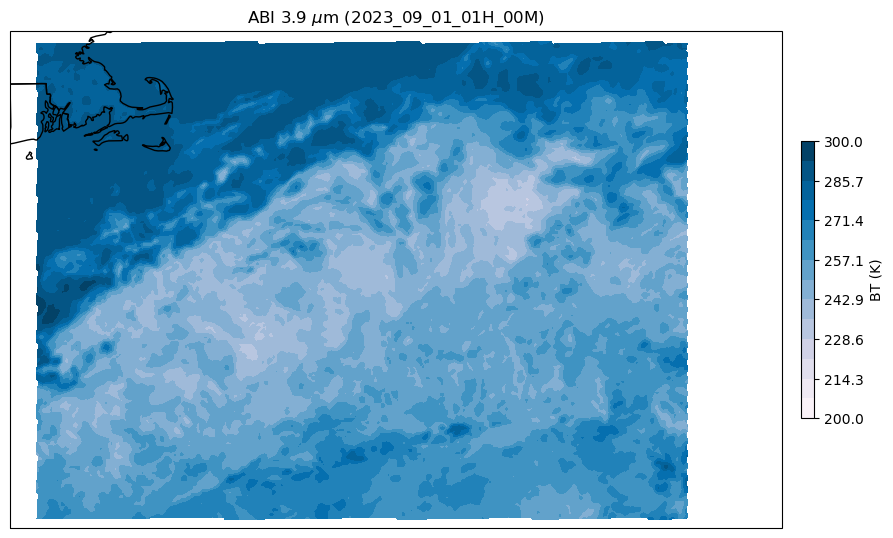

In [25]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.PuBu
levels=np.linspace(200, 300, 15)

c=ax.contourf(BT_c.lon, BT_c.lat, BT_c[0], cmap=cmap, levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('ABI 3.9 $\mu$m ('+datetime+')')
clb.set_label('BT (K)')

ax.add_feature(cfeature.STATES)

In [26]:
def create_frame(filename):
    
    #---Open Band 07 file
    file = open(band07_path+filename, 'rb')
    BT = pickle.load(file)
    file.close()
    
    #---Crop image to the region of interest
    BT_c = BT.where((BT.lat>min_lat) & (BT.lat<max_lat) & (BT.lon>min_lon) & (BT.lon<max_lon))
    BT_c = BT_c.dropna(dim="y", how="all")
    BT_c = BT_c.dropna(dim="x", how="all")
    
    #---Create figure for timestamp
    projection=ccrs.PlateCarree()
    fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
    cmap = plt.cm.PuBu
    levels=np.linspace(200, 300, 15)
    
    c=ax.contourf(BT_c.lon, BT_c.lat, BT_c[0], cmap=cmap, levels=levels)
    clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
    datetime = filename[12:]
    ax.set_title('ABI 3.9 $\mu$m ('+datetime+')')
    clb.set_label('BT (K)')
    ax.add_feature(cfeature.STATES)

    # Save the current figure to a BytesIO buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Read the BytesIO buffer and return as an image
    frame = imageio.imread(buf)

    # Clear the current figure to avoid overlapping plots
    plt.clf()

    return frame

In [27]:
file_list = os.listdir(band07_path)
file_list.sort()

anim_list = []

for filename in file_list:
    
    if filename[0:26] == 'goes_e_band07_2023_09_01_0':
        anim_list += [filename]

In [28]:
anim_list

['goes_e_band07_2023_09_01_00H_00M',
 'goes_e_band07_2023_09_01_00H_10M',
 'goes_e_band07_2023_09_01_00H_20M',
 'goes_e_band07_2023_09_01_00H_30M',
 'goes_e_band07_2023_09_01_00H_40M',
 'goes_e_band07_2023_09_01_00H_50M',
 'goes_e_band07_2023_09_01_01H_00M',
 'goes_e_band07_2023_09_01_01H_10M',
 'goes_e_band07_2023_09_01_01H_20M',
 'goes_e_band07_2023_09_01_01H_30M',
 'goes_e_band07_2023_09_01_01H_40M',
 'goes_e_band07_2023_09_01_01H_50M',
 'goes_e_band07_2023_09_01_02H_00M',
 'goes_e_band07_2023_09_01_02H_10M',
 'goes_e_band07_2023_09_01_02H_20M',
 'goes_e_band07_2023_09_01_02H_30M',
 'goes_e_band07_2023_09_01_02H_40M',
 'goes_e_band07_2023_09_01_02H_50M',
 'goes_e_band07_2023_09_01_03H_00M',
 'goes_e_band07_2023_09_01_03H_10M',
 'goes_e_band07_2023_09_01_03H_20M',
 'goes_e_band07_2023_09_01_03H_30M',
 'goes_e_band07_2023_09_01_03H_40M',
 'goes_e_band07_2023_09_01_03H_50M',
 'goes_e_band07_2023_09_01_04H_00M',
 'goes_e_band07_2023_09_01_04H_10M',
 'goes_e_band07_2023_09_01_04H_20M',
 

In [29]:
frames = []
for filename in anim_list:
    frame = create_frame(filename)
    frames.append(frame)

/tmp/ipykernel_5198/1863344396.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_5198/1863344396.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_5198/1863344396.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_5198/1863344396.py:32: Deprecation

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [30]:
imageio.mimsave('band07_09_01.gif', frames, loop=0, duration=5)